In [1]:
# -*- coding: utf8

import seaborn as sns
from scipy import stats as ss

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Para evitar a confusão da aula passada, colocando alguns defaults!
plt.rcParams['figure.figsize']  = (18, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

In [2]:
plt.ion()
plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize']  = (12, 8)

In [3]:
def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

# Aula15 - Correlação

**Material adaptado do Professor Pedro Olmo.**

## Objetivos

1. Entender como sumarizar dados em duas dimensões.
1. Entender correlação e covariância.
1. Entender o paradoxo de simpson.

## Resultado Esperado

1. Sumarização de dados em duas dimensões.
1. Correlação não é causalidade.

## Introdução

Lembrando das aulas anteriores, podemos usar estatísticas para sumarizar dados e suas tendências centrais. Embora seja um campo rico, ainda não exploramos a ideia de tendências centrais em dados de duas dimensões. Nesta aula, teremos uma abordagem de exploração.

## Dados Sintéticos

Vamos inicial entendendo os gráficos de dispersão para pares de colunas. Inicialmente, queremos ter alguma indicação visual da correlação entre nossos dados. Sendo $X = \{x_1, x_2, \cdots\}$ e $Y = \{y_1, y_2, \cdots\}$ um par de colunas, o gráfico mostra um ponto em cada coordenada ($x_i$, $y_i$). 

No primeiro vamos mostrar um plot de números aleatórios de uma normal. Para cada linha, vamos gerar de forma **independente** outra normal. Como seria um formato esperado do gráfico?

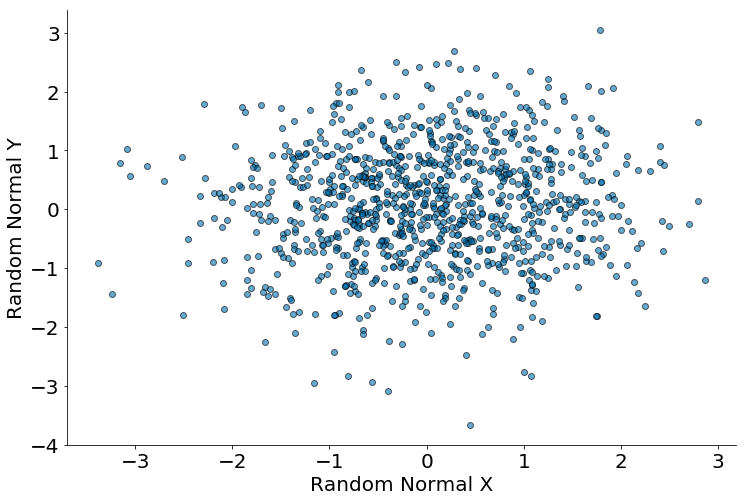

In [4]:
x = np.random.randn(1000)
y = np.random.randn(1000)
plt.scatter(x, y, edgecolor='k', alpha=0.6)
plt.xlabel('Random Normal X')
plt.ylabel('Random Normal Y')
despine()

No segundo vamos mostrar um plot no eixo x números aleatórios de uma normal. No eixo y, vamos plotar o valor de x adicionados de outra normal. Qual é o valor esperado?

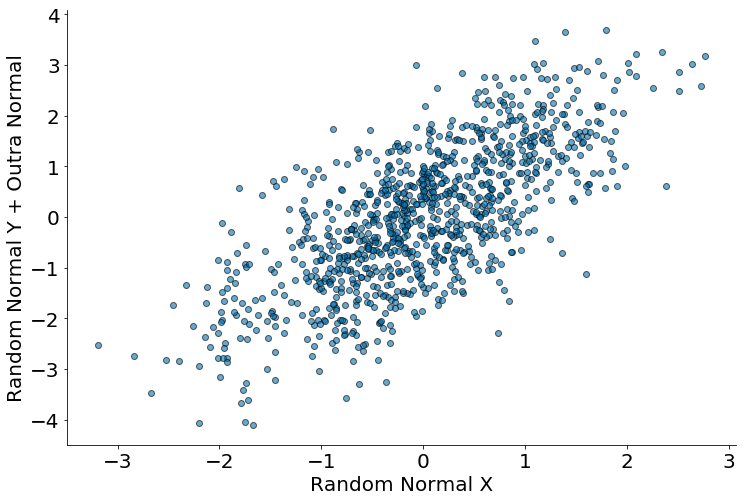

In [5]:
x = np.random.randn(1000)
y = x + np.random.randn(1000)
plt.scatter(x, y, edgecolor='k', alpha=0.6)
plt.xlabel('Random Normal X')
plt.ylabel('Random Normal Y + Outra Normal')
despine()

Agora vamos fazer $-x - Normal(0, 1)$.

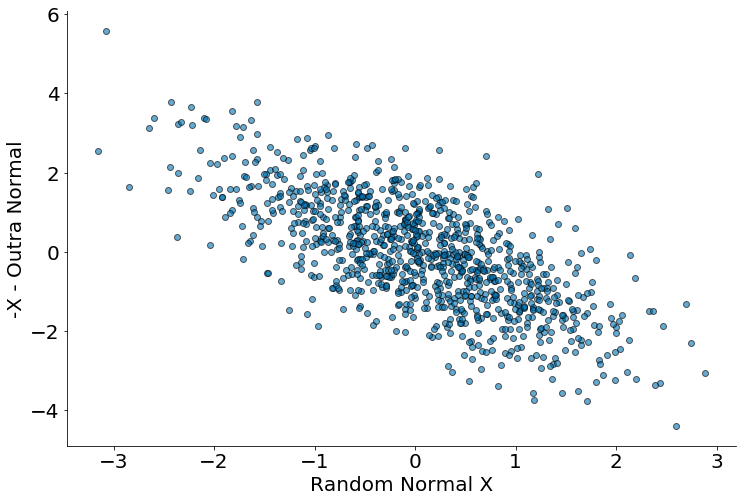

In [6]:
x = np.random.randn(1000)
y = -x - np.random.randn(1000)
plt.scatter(x, y, edgecolor='k', alpha=0.6)
plt.xlabel('Random Normal X')
plt.ylabel('-X - Outra Normal')
despine()

Por fim, um caso quadrático.

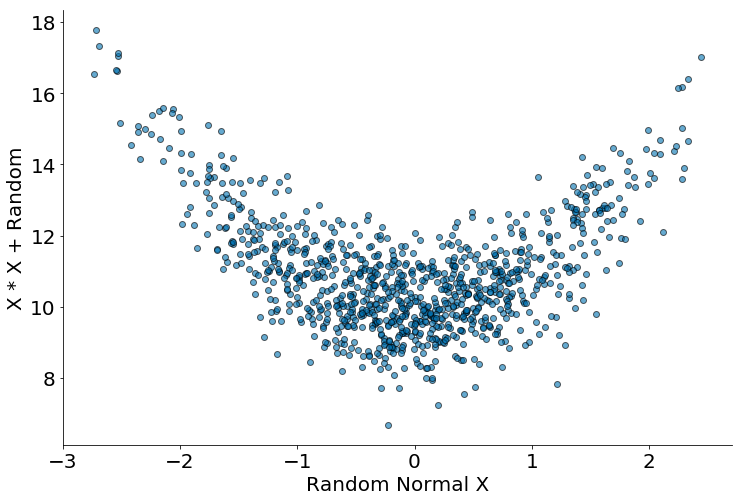

In [7]:
x = np.random.randn(1000)
y = x * x + np.random.randn(1000) + 10
plt.scatter(x, y, edgecolor='k', alpha=0.6)
plt.xlabel('Random Normal X')
plt.ylabel('X * X + Random')
despine()

## Dados Reais

Nesta aula vamos utilizados dados de preços de carros híbridos. Nos EUA, um carro híbrido pode rodar tanto em eletricidade quanto em combustível. A tabela contém as vendas de 1997 até 2003.

Uma máxima dessa aula será: **Sempre visualize seus dados**. 

As colunas são:

1. **vehicle:** model of the car
1. **year:** year of manufacture
1. **msrp:** manufacturer’s suggested retail price in 2013 dollars
1. **acceleration:** acceleration rate in km per hour per second
1. **mpg:** fuel econonmy in miles per gallon
1. **class:** the model’s class.

### Olhando para os Dados

Vamos iniciar olhando para cada coluna dos dados.

In [8]:
df = pd.read_csv('hybrid.csv')
df['msrp'] = df['msrp'] / 1000
df.head()

,vehicle,year,msrp,acceleration,mpg,class
0,Prius (1st Gen),1997,24.50974,7.46,41.26,Compact
1,Tino,2000,35.35497,8.20,54.10,Compact
2,Prius (2nd Gen),2000,26.83225,7.97,45.23,Compact
3,Insight,2000,18.93641,9.52,53.00,Two Seater
4,Civic (1st Gen),2001,25.83338,7.04,47.04,Compact


A coluna MSRP é o preço médio de venda. Cada linha da tabela é um carro. 

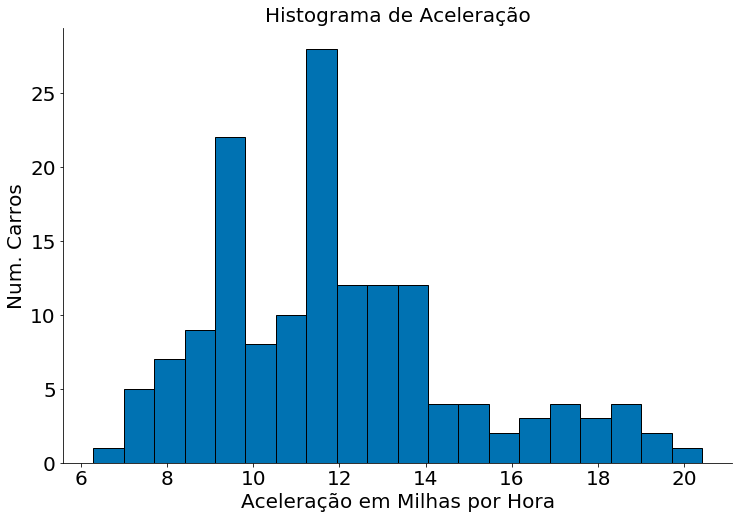

In [9]:
plt.hist(df['acceleration'], bins=20, edgecolor='k')
plt.title('Histograma de Aceleração')
plt.xlabel('Aceleração em Milhas por Hora')
plt.ylabel('Num. Carros')
despine()

A coluna Year é o ano de fabricação.

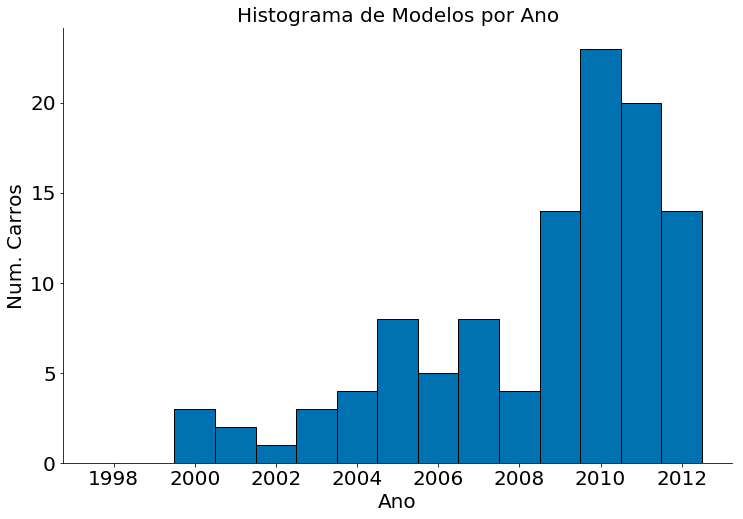

In [10]:
bins = np.arange(1997, 2013) + 0.5
plt.hist(df['year'], bins=bins, edgecolor='k')
plt.title('Histograma de Modelos por Ano')
plt.xlabel('Ano')
plt.ylabel('Num. Carros')
despine()

A coluna MSRP é o preço do carro.

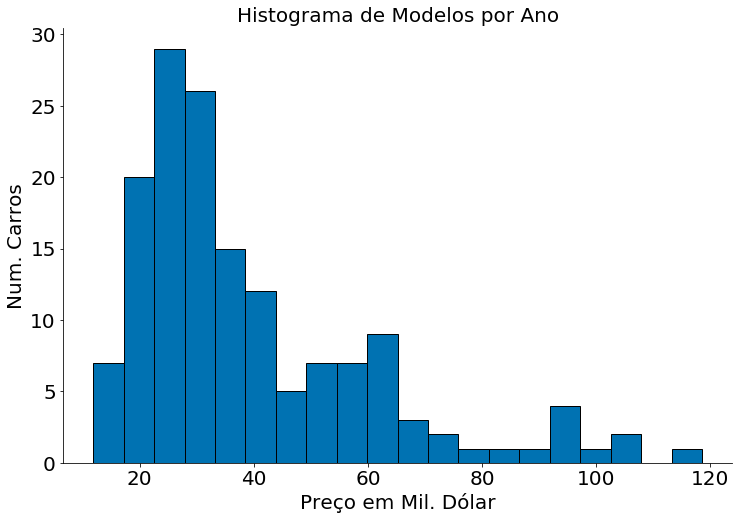

In [11]:
plt.hist(df['msrp'], bins=20, edgecolor='k')
plt.title('Histograma de Modelos por Ano')
plt.xlabel('Preço em Mil. Dólar')
plt.ylabel('Num. Carros')
despine()

A coluna MPG captura as milhas por hora.

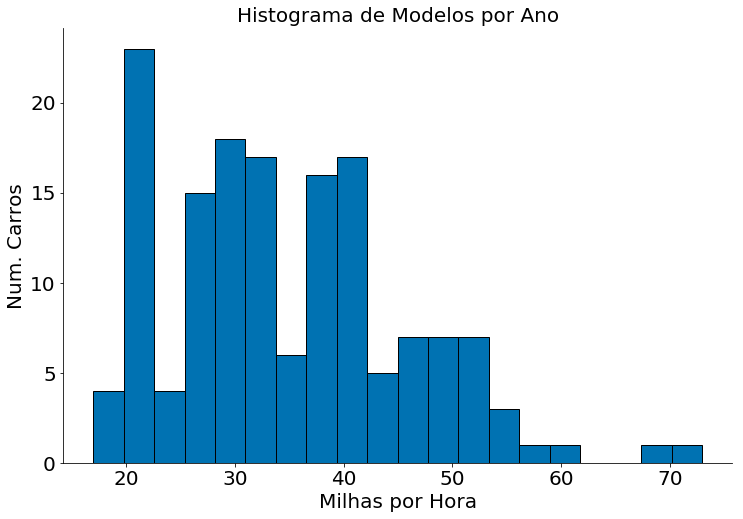

In [12]:
plt.hist(df['mpg'], bins=20, edgecolor='k')
plt.title('Histograma de Modelos por Ano')
plt.xlabel('Milhas por Hora')
plt.ylabel('Num. Carros')
despine()

Os gráficos acima nos dão uma visão geral dos dados. Note que, como esperado, cada coluna tem uma faixa diferente de valores no eixo-x. Além do mais, a concentração (lado esquerdo/direito) diferente entre as colunas. Como que podemos comparae as colunas? Cada uma está representada em uma unidade diferente.

Vamos fazer os gráficos de dispersão para todos os pares.

### Dispersão

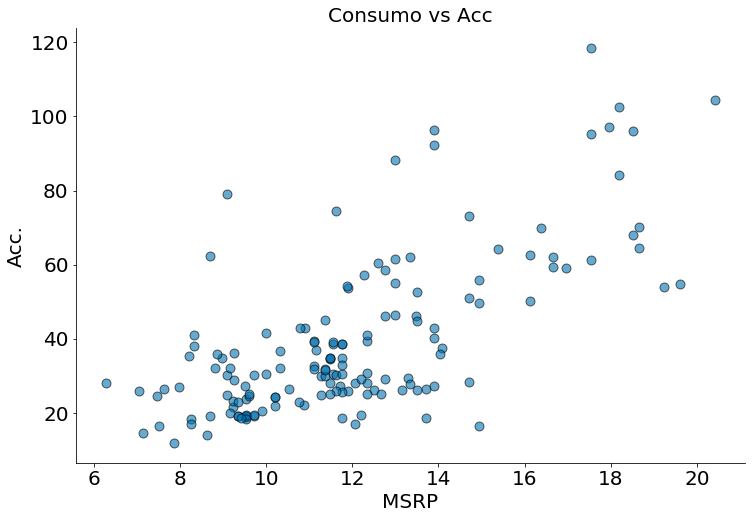

In [13]:
plt.scatter(df['acceleration'], df['msrp'], edgecolor='k', alpha=0.6, s=80)
plt.xlabel('MSRP')
plt.ylabel('Acc.')
plt.title('Consumo vs Acc')
despine()

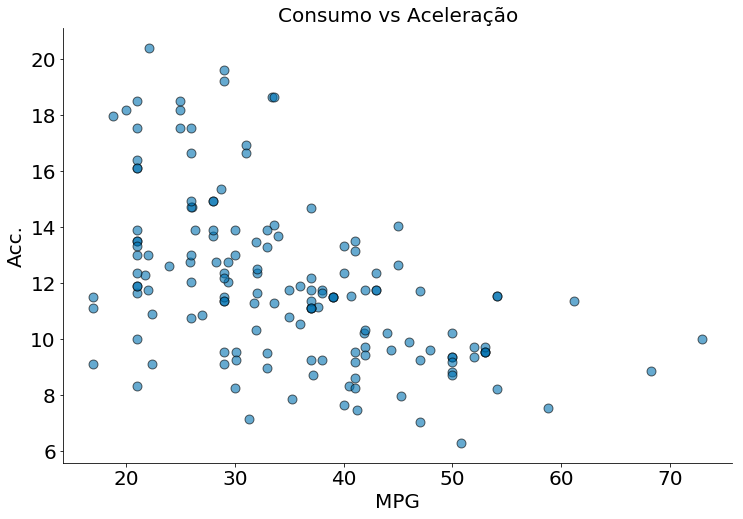

In [14]:
plt.scatter(df['mpg'], df['acceleration'], edgecolor='k', alpha=0.6, s=80)
plt.xlabel('MPG')
plt.ylabel('Acc.')
plt.title('Consumo vs Aceleração')
despine()

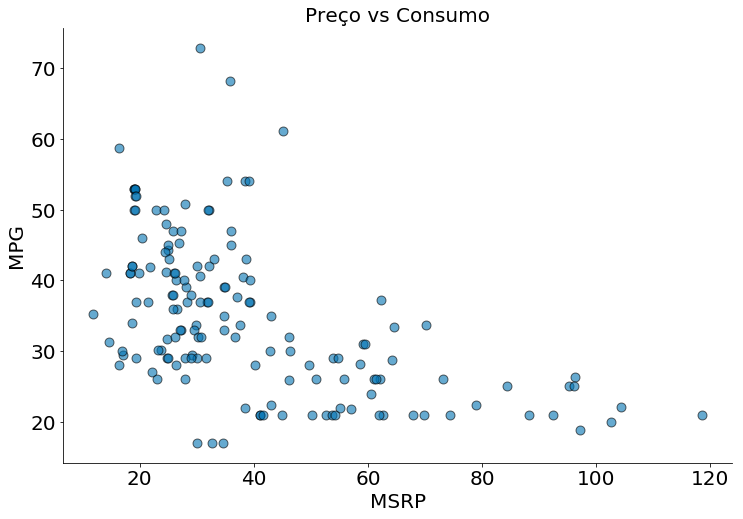

In [15]:
plt.scatter(df['msrp'], df['mpg'], edgecolor='k', alpha=0.6, s=80)
plt.xlabel('MSRP')
plt.ylabel('MPG')
plt.title('Preço vs Consumo')
despine()

## Covariânça

Agora analisaremos a covariância, o análogo pareado da variância. Enquanto a variância mede como uma única variável se desvia de sua média, a covariância mede como duas variáveis $X = \{x_1, \cdots, x_n\}$ e $Y = \{y_1, \cdots, y_n\}$  variam em conjunto a partir de suas médias $\bar{x}$ e $\bar{y}$:

$$cov(X, Y) = \frac{\sum_{i=1}^{n}{(x_i - \bar{x})(y_i - \bar{y})}}{n-1},$$

$$(x_i - \bar{x})(y_i - \bar{y})$$

In [16]:
def covariance(x, y):
    n = len(x)
    x_m = x - np.mean(x)
    y_m = y - np.mean(y)
    return (x_m * y_m).sum() / (n - 1)

In [17]:
covariance(df['acceleration'], df['msrp'])

43.809528657120744

In [18]:
covariance(df['msrp'], df['mpg'])

-125.00248062016253

Entendendo a estatística. Quando os elementos correspondentes de `x` e `y` estão ambos acima de suas médias ou ambos abaixo de suas médias, um número positivo entra na soma. Quando um está acima de sua média e o outro abaixo, um número negativo entra na soma. Assim, uma covariância positiva “grande” significa que `x` tende a ser grande quando `y` é grande, e pequeno quando `y` é pequeno. Uma covariância negativa “grande” significa o oposto - que `x` tende a ser pequeno quando `y` é grande e vice-versa. Uma covariância próxima de zero significa que não existe tal relação.

Para entender, veja a tabela abaixo que mostra três colunas novas. Inicialmente podemos ver a diferença de cada coluna com sua média. Por fim, podemos ver também uma coluna impacto. A mesma tem valor 1 quando o sinal é o mesmo das colunas subtraídas da média. Uma métrica de correlação vai ser proporcional ao valor da soma deste impacto.

In [ ]:
df_n = df[['msrp', 'mpg']].copy()
df_n['msrp_menos_media'] = df_n['msrp'] - df['msrp'].mean()
df_n['mpg_menos_media'] = df_n['mpg'] - df['mpg'].mean()
df_n['impacto'] = np.zeros(len(df_n)) - 1
df_n['impacto'][(df_n['mpg_menos_media'] > 0) & (df_n['msrp_menos_media'] > 0)] = 1
df_n['impacto'][(df_n['mpg_menos_media'] < 0) & (df_n['msrp_menos_media'] < 0)] = 1
df_n.head(n=20)

,msrp,mpg,msrp_menos_media,mpg_menos_media,impacto
0,24.50974,41.26,-14.809695,6.462549,-1.0
1,35.35497,54.10,-3.964465,19.302549,-1.0
2,26.83225,45.23,-12.487185,10.432549,-1.0
3,18.93641,53.00,-20.383025,18.202549,-1.0
4,25.83338,47.04,-13.486055,12.242549,-1.0
5,19.03671,53.00,-20.282725,18.202549,-1.0
6,19.13701,53.00,-20.182425,18.202549,-1.0
7,38.08477,40.46,-1.234665,5.662549,-1.0
8,19.13701,53.00,-20.182425,18.202549,-1.0
9,14.07192,41.00,-25.247515,6.202549,-1.0


In [ ]:
def corr(x, y):
    n = len(x)
    x_m = x - np.mean(x)
    x_m = x_m / np.std(x, ddof=1)
    y_m = y - np.mean(y)
    y_m = y_m / np.std(y, ddof=1)
    return (x_m * y_m).sum() / (n - 1)

No entanto, a covariância pode ser difícil de interpretar por duas razões principais:

* Suas unidades são o produto das unidades das entradas. Como interpretar o produto de aceleração por preço?
* A métrica não é normalizada. Cov(X, Y) de -125 é um valor alto? Note que ao multiplica X * 2 a mesma duplica, mas uma relação linear não muda muito neste caso.

Por esse motivo, é mais comum observar a [correlação de Pearson](https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson). Uma forma de estimar a mesma é padronizar as variáveis. Assim, vamos fazer uma transformada $Z$:

$$\hat{X} = \frac{X - \bar{x}}{s_x}$$

$$\hat{Y} = \frac{Y - \bar{y}}{s_y}$$

Lembrando que $\bar{x}$ é a média e $s_x$ o desvio padrão. Podemos estimar os mesmos dos dados. Ao computar a covariânça com os novos valores normalizados, teremos um resultado final entre 0 e 1. 

$$corr(X, Y) = \frac{\sum_i \frac{x_i - \bar{x}}{s_x} \frac{y_i - \bar{x}}{s_y}}{n-1}$$

Ou de forma equivalente:

$$corr(X, Y) = \frac{cov(X, Y)}{s_x s_y}$$.

In [ ]:
corr(df['acceleration'], df['msrp'])

0.69557789969139794

In [ ]:
corr(df['msrp'], df['mpg'])

-0.53182636336837852

Por fim, a biblioteca __seaborn__ permite observar todas as correlações em um único plot!

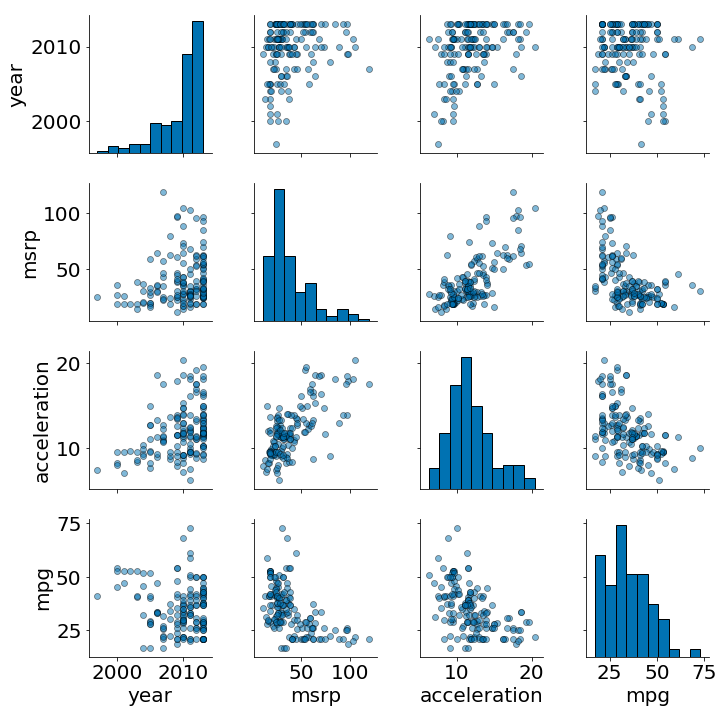

In [ ]:
sns.pairplot(df, diag_kws={'edgecolor':'k'}, plot_kws={'alpha':0.5, 'edgecolor':'k'})

## Spearman

Para casos não lineares você pode usar um coeficiente de correlação de posto (*rank correlation coefficient*). 

O [coeficiente de correlação de *Spearman*](https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_postos_de_Spearman) $\rho$ é definido como o coeficiente de correlação de Pearson para os postos das variáveis. Para uma amostra de tamanho $n$, os valores originais $X_{i},Y_{i}$ das variáveis $X$ e $Y$ são convertidos em postos (*ranks*) $\operatorname {rg} X_{i},\operatorname {rg} Y_{i}$, sendo $\rho$ calculado como:

$$\rho = r({\operatorname {rg} _{X},\operatorname {rg} _{Y}})={\frac {\operatorname {cov} (\operatorname {rg} _{X},\operatorname {rg} _{Y})}{\sigma _{\operatorname {rg} _{X}}\sigma _{\operatorname {rg} _{Y}}}}$$

em que

$r(.)$  denota o coeficiente de correlação de Pearson usual, mas calculado sobre os postos das variáveis;

$\operatorname {cov} (\operatorname {rg} _{X},\operatorname {rg} _{Y})$ são as covariâncias dos postos das variáveis;

$\sigma _{\operatorname {rg} _{X}}$ and $\sigma _{\operatorname {rg} _{Y}}$ são os desvios padrões dos postos das variáveis. 

Para computar o posto vamos usar a função abaixo.

In [ ]:
def rank(x):
    aux = x.argsort()
    return aux.argsort()

Primeiro, fazemos um `argsort` no vetor. Esta operação retorna, para cada elemento do vetor, sua posição quando o vetor for ordenado. Isto é:

`x[x.argsort()] == x.sort()`

In [ ]:
x = np.array([7, 8, 9, 10, 1])
x

array([ 7,  8,  9, 10,  1])

In [ ]:
x.argsort()

array([4, 0, 1, 2, 3])

In [ ]:
x[x.argsort()]

array([ 1,  7,  8,  9, 10])

Quando chamamos `argsort` duas vezes:

1. Retorna a posição dos elementos quando o vetor for ordenado.
2. Ao ordenar as posições, qual é o posto (rank) do item? Isto é, é o primeiro, segundo, terceiro menor.

In [ ]:
x.argsort().argsort()

array([1, 2, 3, 4, 0])

In [ ]:
x

array([ 7,  8,  9, 10,  1])

Observe no resultado acima que:

1. 7 é o segundo elemento
1. 8 é o terceiro
1. 9 é o quarto
1. 0 é o primeiro

Assim, para computar a correlação de spearman basta correlacionar o vetor de postos.

### Spearman com Dados Sintéticos

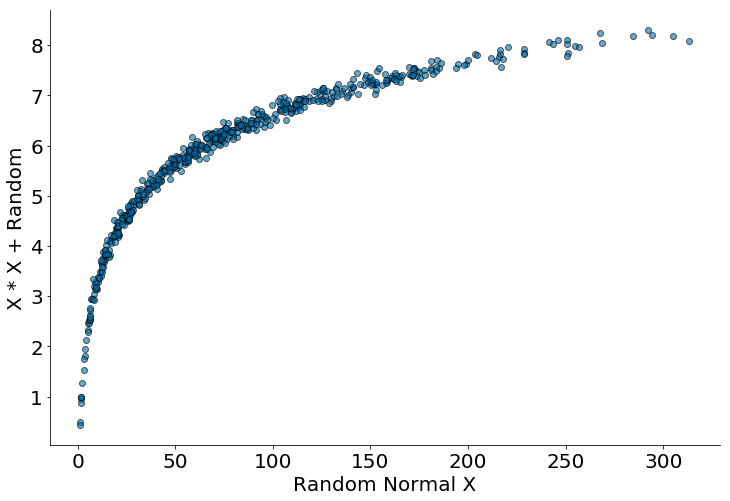

In [ ]:
x = np.random.normal(10, 100, 1000)
x = x[x > 0]
y = np.log2(x) + np.random.normal(0, 0.1, len(x))
plt.scatter(x, y, edgecolor='k', alpha=0.6)
plt.xlabel('Random Normal X')
plt.ylabel('X * X + Random')
despine()

In [ ]:
x_p = rank(x)
y_p = rank(y)

In [ ]:
corr(x, y)

0.86270073649509271

In [ ]:
corr(x_p, y_p)

0.99631238826251467

Como sempre, as funções já existem em Python:

In [ ]:
rho, p_val = ss.pearsonr(x, y)
print(rho)
print(p_val)

0.862700736495
1.01146850096e-161


In [ ]:
rho, p_val = ss.spearmanr(x, y)
print(rho)
print(p_val)

0.996312388263
0.0


## Valores-p de Correlações

Note que os resultados de scipy vêm com um Valor-p. Lembrando das aulas anteriores, como seria uma hipótese nula para uma correlação?

1. H0: A correlação observada é estatisticamente explicada por permutações.
1. H1: A correlação observada é mais extrema do que permutações

Observe como os dados abaixo tem uma correlação quase que perfeita!

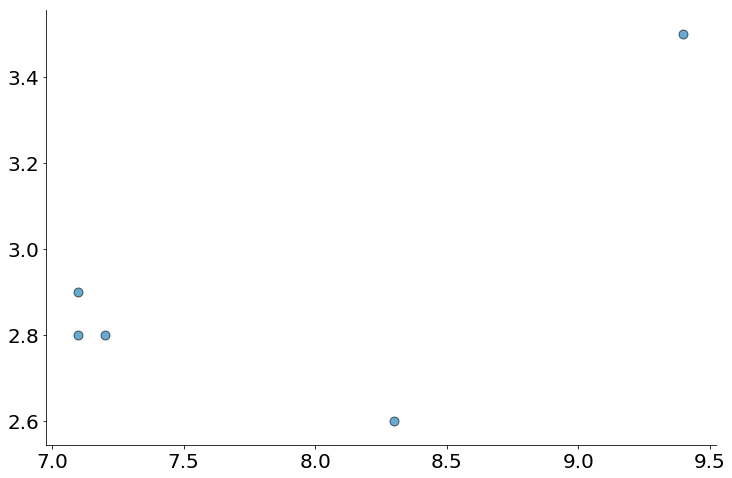

In [ ]:
x = np.array([7.1, 7.1, 7.2, 8.3, 9.4])
y = np.array([2.8, 2.9, 2.8, 2.6, 3.5])
plt.scatter(x, y, edgecolor='k', alpha=0.6, s=80)
despine()

In [ ]:
corr(x, y)

0.67322546968309638

Temos uma correlação até que OK! Agora vamos permutar X 10,000 vezes.

In [ ]:
x_perm = x.copy()
perm_corr = []
for _ in range(10000):
    np.random.shuffle(x_perm)
    perm_corr.append(corr(x_perm, y))
perm_corr = np.array(perm_corr)

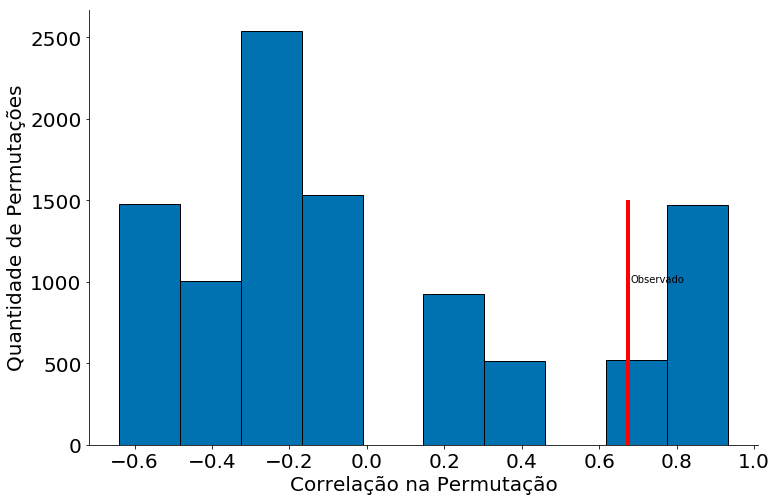

In [ ]:
plt.hist(perm_corr, edgecolor='k')
plt.xlabel('Correlação na Permutação')
plt.ylabel('Quantidade de Permutações')
plt.vlines(corr(x, y), 0, 1500, color='r')
plt.text(0.68, 1000, 'Observado')
despine()

In [ ]:
sum(perm_corr > corr(x, y)) / len(perm_corr)

0.1628

A mesma não é significativa :-(

### Spearman com Dados Reais

Note como a correlação de spearman é um pouco melhor nos dados abaixo:

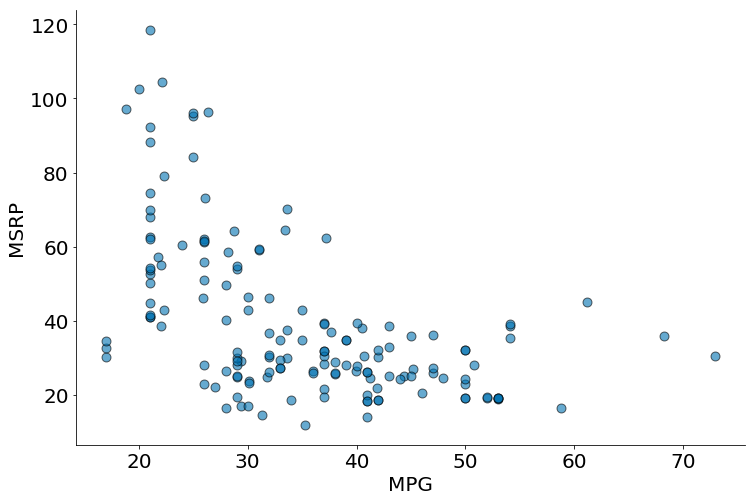

In [ ]:
x = df['mpg']
y = df['msrp']

plt.scatter(x, y, edgecolor='k', alpha=0.6, s=80)
plt.xlabel('MPG')
plt.ylabel('MSRP')
despine()

In [ ]:
x_p = rank(x)
y_p = rank(y)

In [ ]:
corr(x, y)

-0.53182636336837852

In [ ]:
corr(x_p, y_p)

-0.57724190154530708

## Entendendo uma correlação

Nas próximas aulas vamos explorar o conceito de regressão linear. As nossas correlações até o momento já estão explorando tal correlação. Abaixo vemos 4 bases de dados com a melhor regressão.

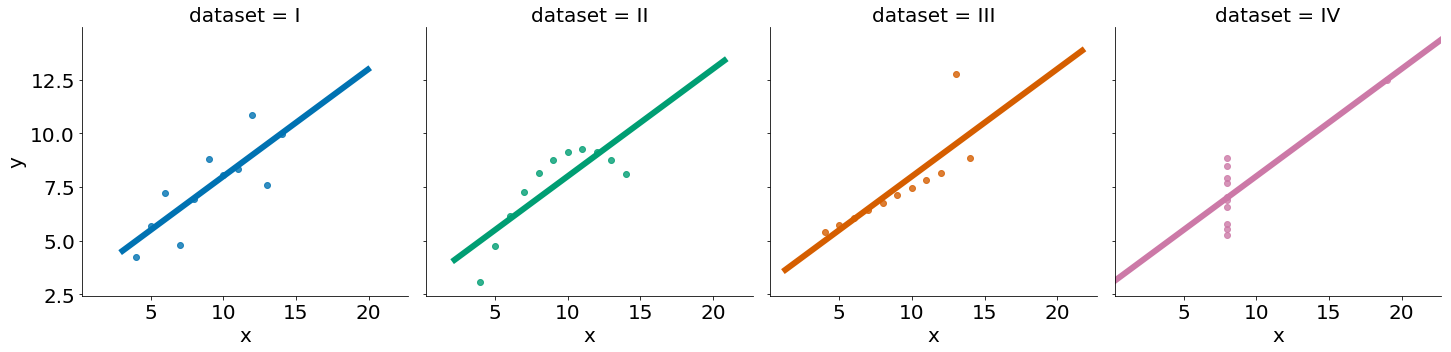

In [ ]:
anscombe = sns.load_dataset('anscombe')
sns.lmplot(x='x', y='y', col='dataset', hue='dataset', data=anscombe, ci=None)

In [ ]:
for data in ['I', 'II', 'IV', 'V']:
    sub = anscombe.query('dataset == "{}"'.format(data))
    print('spearman', ss.spearmanr(sub['x'], sub['y'])[0])
    print('pearson', ss.pearsonr(sub['x'], sub['y'])[0])

spearman 0.818181818182
pearson 0.816420516345
spearman 0.690909090909
pearson 0.816236506
spearman 0.5
pearson 0.816521436889
spearman nan
pearson nan


/Users/flaviov/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:2998: RuntimeWarning: Mean of empty slice.
  mx = x.mean()
/Users/flaviov/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/flaviov/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:2999: RuntimeWarning: Mean of empty slice.
  my = y.mean()
/Users/flaviov/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


## Algumas Outras Advertências Correlacionais

Uma correlação de zero indica que não há relação linear entre as duas variáveis. No entanto, outros tipos de relacionamentos podem existir. Por exemplo, se:

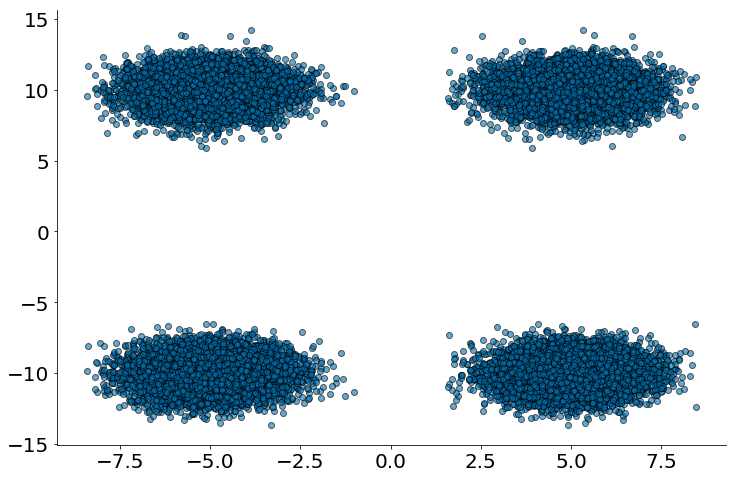

In [ ]:
x1 = np.random.normal(5, 1, 10000)
x2 = np.random.normal(-5, 1, 10000)
y1 = np.random.normal(10, 1, 10000)
y2 = np.random.normal(-10, 1, 10000)
x = np.concatenate((x1, x2, x2, x1))
y = np.concatenate((y1, y2, y1, y2))
plt.scatter(x, y, alpha=0.6, edgecolors='k')
despine()

então `x` e `y` têm correlação perto de zero. Mas eles certamente têm um relacionamento. Observe os quatro grupos!

## Correlação e Causalidade

Lembrando de que que "correlação não é causalidade", provavelmente por alguém que olha dados que representam um desafio para partes de sua visão de mundo que ele estava relutante em questionar. No entanto, este é um ponto importante - se `x` e `y` estão fortemente correlacionados, isso pode significar que `x` causa `y`, `y` causa `x`, que cada um causa o outro, que algum terceiro fator causa ambos, ou pode não significar nada.

Nos exemplos acima:

1. Quanto maior o consumo de um carro, mais o mesmo acelera. Podemos concluir causalidade?
1. Quanto maior a aceleração, maior o preço. Podemos concluir causalidade?

No primeiro caso temos uma relação física, para obter uma maior velocidade precisamos queimar mais combustível. Isto é esperado dado a mecânica do carro. E no segundo caso?! Pode existir uma série de variáveis que levam a um maior preço. Não podemos dizer que é apenas a aceleração. Pode ser que os carros que aceleram mais são carros esportivos. O mesmo vai ter um preço alto mesmo se não acelerar muito.

## Dados Categóricos

Para explorar dados categóricos vamos fazer um da estatística $\chi^2$. Para uma tabela de dados, a estatística $\chi^2$ é definida como:

$$\chi^2=\sum_{i=1}^n \frac{(O_i-E_i)^2}{E_i}$$

Aqui, $O_i$ é um valor observado e $E_i$ é um valor esperado. Note que quanto maior este valor, mais o Observado difere do Esperado. O problema é, como definir $E_i$? É aqui que podemos levantar uma hipótese nula. Qual é ao valor esperado caso a seleção fosse uniforme?

Vamos explorar essa ideia abaixo. Para tal, vamos fazer um teste de permutações.

In [ ]:
def permuta(df, coluna):
    '''
    Permuta um dataframe com base e uma coluna categórica.
    Este código é mais lento pois cria uma cópia.
    
    Parâmetros
    ----------
    df: o dataframe
    coluna: uma coluna categórica
    
    Retorna
    -------
    um novo df permutado
    '''
    
    novo = df.copy()            # Cópia dos dados
    dados = df[coluna].copy()   # Copia da coluna, evitar um warning pandas. Deve ter forma melhor de fazer.
    np.random.shuffle(dados)    # Faz o shuffle
    novo[coluna] = dados        # Faz overwrite da coluna
    return novo

Aqui leio os dados do Titanic.

1. class: a classe, quanto maior mais cara a passage. O caso especial 0 é a classe de tripulantes. 
1. Age, Sex e Survived. Valor um quando presente (sobreviveu), zero quando ausente (não sobreviveu). Para age, 1 e 0 captura crianças (0) e adultos (1).

In [ ]:
df = pd.read_csv('./survival_titanic.csv')
df.tail()

,class,Age,Sex,Survived
2196,0,1,0,1
2197,0,1,0,1
2198,0,1,0,0
2199,0,1,0,0
2200,0,1,0,0


Vamos montar uma tabela de contigência na mão. Para tal, vou inidicar contando a fração de pessoas que sobreviveram por classe. Podemos aplicar o group-by na classe e tirar a média. Lembrando que a média de 1s e 0s captura uma fração.

In [ ]:
df[['class', 'Survived']].groupby('class').mean()

,Survived
class,
0,0.239548
1,0.624615
2,0.414035
3,0.252125


Agora montar o dataframe novo. 

ps: existe uma função `crosstab` do pandas que faz tudo isso. Estamos fazendo na mão para aprender.

In [ ]:
cont = df[['class', 'Survived']].groupby('class').mean() # taxa survival
cont['Died'] = 1 - cont['Survived'] # não survival, nova coluna 1-
cont['Count'] = df[['class']].groupby('class').size() # número em cada classe
cont

,Survived,Died,Count
class,,,
0,0.239548,0.760452,885
1,0.624615,0.375385,325
2,0.414035,0.585965,285
3,0.252125,0.747875,706


Agora, vamos computar a taxa de sobrevência global.

In [ ]:
df['Survived'].mean()

0.32303498409813719

Com a taxa acima posso criar um novo dataframe do que seria esperado em um mundo uniforme.

In [ ]:
unif = cont.copy()
unif['Survived'] = df['Survived'].mean()
unif['Died'] = 1 - df['Survived'].mean()
unif

,Survived,Died,Count
class,,,
0,0.323035,0.676965,885
1,0.323035,0.676965,325
2,0.323035,0.676965,285
3,0.323035,0.676965,706


E por fim, computar:

$$\chi^2=\sum_{i=1}^n \frac{(O_i-E_i)^2}{E_i}$$

In [ ]:
chi_sq = (cont - unif) ** 2
chi_sq = chi_sq / unif
chi_sq

,Survived,Died,Count
class,,,
0,0.021577,0.010296,0.0
1,0.281551,0.134351,0.0
2,0.025635,0.012233,0.0
3,0.015566,0.007428,0.0


Por coluna

In [ ]:
chi_sq.sum()

Survived    0.344328
Died        0.164307
Count       0.000000
dtype: float64

Tudo

In [ ]:
t_obs = chi_sq.sum().sum()
t_obs

0.50863537978717643

Daqui para frente é só fazer o teste de permutação! Observe uma permutação abaixo.

In [ ]:
permut = permuta(df, 'class')
cont_p = permut[['class', 'Survived']].groupby('class').mean()
cont_p['Died'] = 1 - cont_p['Survived']
cont_p['Count'] = df[['class']].groupby('class').size()
cont_p

,Survived,Died,Count
class,,,
0,0.323164,0.676836,885
1,0.323077,0.676923,325
2,0.259649,0.740351,285
3,0.348442,0.651558,706


Como o valor muda

In [ ]:
chi_sq = (cont_p - unif) ** 2
chi_sq = chi_sq / unif
chi_sq.sum().sum()

0.021324429968413203

1000 permutações. 10000 demora muito. Mas neste caso com 1000 já podemos ver que `t_obs=0.5` é bem raro.

In [ ]:
chi_sqs = []
for _ in range(1000):
    permut = permuta(df, 'class')
    cont_p = permut[['class', 'Survived']].groupby('class').mean()
    cont_p['Died'] = 1 - cont_p['Survived']
    cont_p['Count'] = df[['class']].groupby('class').size()
    chi_sq = (cont_p - unif) ** 2
    chi_sq = chi_sq / unif
    stat = chi_sq.sum().sum()
    chi_sqs.append(stat)

In [ ]:
plt.hist(chi_sqs, edgecolor='k')
plt.xlabel(r'$\chi^2$')
plt.ylabel('Num Amostras Permutadas')

## Paradoxo de Simpson

Correlação está medindo a relação entre suas duas variáveis **sendo todo o resto igual**. Ou seja, não controlamos por nenhum outro efeito. Assuma que os dados agoram vêm de grupos diferentes. Se seus grupos de dados são atribuídos uniforme, como em um experimento bem projetado, **sendo todo o resto igual** pode não ser uma suposição terrível. Mas quando há um padrão mais profundo para atribuições de grupos, **sendo todo o resto igual** pode ser uma suposição terrível.

Considere os dados sintéticos abaixo. Parece que temos uma correlação linear!

In [ ]:
x1 = np.random.normal(10, 1, 1000)
y1 = -x1 + np.random.normal(0, 2, 1000)

x2 = np.random.normal(12, 1, 1000)
y2 = -x2 + np.random.normal(6, 2, 1000)

x3 = np.random.normal(14, 1, 1000)
y3 = -x3 + np.random.normal(12, 2, 1000)

x = np.concatenate([x1, x2, x3])
y = np.concatenate([y1, y2, y3])
plt.scatter(x, y, edgecolor='k', alpha=0.6)
plt.xlabel('Excercise')
plt.ylabel('Cholesterol')
plt.xticks([])
plt.yticks([])
despine()

Porém eu, Flavio, escolhi os grupos de forma que afetam o resultado. Embora sejam dados sintéticos, tal efeito já foi observado em estudos sobre colesterol.

1. Existe um crescimento no colesterol com a idade.
1. Porém, existe uma redução com atividade física.

O paradoxo: Não podemos ver o segundo ponto, pois o crescimento com a idade domina.

In [ ]:
x1 = np.random.normal(10, 1, 1000)
y1 = -x1 + np.random.normal(0, 2, 1000)

x2 = np.random.normal(12, 1, 1000)
y2 = -x2 + np.random.normal(6, 2, 1000)

x3 = np.random.normal(14, 1, 1000)
y3 = -x3 + np.random.normal(12, 2, 1000)

plt.scatter(x1, y1, edgecolor='k', alpha=0.6, label='Children')
plt.scatter(x2, y2, edgecolor='k', alpha=0.6, label='Adults')
plt.scatter(x3, y3, edgecolor='k', alpha=0.6, label='Elderly')
plt.xlabel('Excercise')
plt.ylabel('Cholesterol')
plt.xticks([])
plt.yticks([])
plt.legend()
despine()

### Paradoxo em Dados Categóricos

Por fim, temos dados reais de contratações em Berkeley nos anos 70. Os dados estão estratificados por departamento. Quebrei os mesmos por gênero.

In [ ]:
df = pd.read_csv('berkeley.csv', index_col=0)
male = df[['Admitted_Male', 'Denied_Male']]
female = df[['Admitted_Female', 'Denied_Female']]
male.head()

In [ ]:
male.head()

No geral, mulheres são admitidas com uma taxa menor!

In [ ]:
male.sum() / male.sum().sum()

In [ ]:
female.sum() / female.sum().sum()

Só que por departamento, a taxa é maior! Qual o motivo? Estamos computando frações. Mulheres aplicavam para os departamentos mais concorridos!

In [ ]:
male.T / male.sum(axis=1)

In [ ]:
female.T / female.sum(axis=1)

## Para explorações futuras

* [`SciPy`](https://www.scipy.org/) e [`StatsModels`](https://www.statsmodels.org/stable/index.html) vêm com outras funções de correlação (e.g., kendall).
* https://en.wikipedia.org/wiki/Correlation_does_not_imply_causation